In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np
import matplotlib

%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)


In [2]:
df = exp.get_wp_energy_data()
df.head()

,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,wp_RNET,...,wp_bnd3,wp_bnd7,wp_evi,wp_lswi2,wp_ndvi,wp_LST.day,wp_LST.night,LW_IN.wp,LW_IN.si,LW_IN
0,7.33,0.808731,19.179167,195,0.0,22.320833,30.3156,4.958333,2012,20.798342,...,0.034186,0.145936,0.355407,0.286584,0.611743,31.567899,17.204530,29.105844,24.562860,29.105844
1,6.52,0.755945,19.325000,196,0.0,21.770833,29.6316,3.791667,2012,20.573593,...,0.032614,0.138714,0.362843,0.317110,0.624457,29.570000,17.390000,29.760736,26.096551,29.760736
2,6.92,0.858993,20.262500,197,0.0,21.908333,29.3472,4.137500,2012,20.475931,...,0.031043,0.131493,0.370279,0.347637,0.637171,31.097908,17.235624,30.299442,25.986418,30.299442
3,6.35,0.477617,16.791667,198,0.0,22.420833,28.8180,6.033333,2012,20.571045,...,0.029471,0.124271,0.377714,0.378163,0.649886,30.868718,17.248525,28.978868,25.122209,28.978868
4,5.13,0.556820,17.016667,199,0.0,21.529167,23.1732,4.350000,2012,16.757401,...,0.027900,0.117050,0.385150,0.408689,0.662600,30.657792,17.259663,30.653667,27.830367,30.653667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 28 columns):
PET             1028 non-null float64
VPD             1028 non-null float64
air_temp        1028 non-null float64
doy             1028 non-null int64
precip          1028 non-null float64
soil_temp       1028 non-null float64
sw_in           1028 non-null float64
wind_speed      1028 non-null float64
year            1028 non-null int64
wp_RNET         1028 non-null float64
wp_ch4_gf       1028 non-null float64
wp_co2_gf       1028 non-null float64
wp_er           1028 non-null float64
wp_gpp          1028 non-null float64
wp_h            1028 non-null float64
wp_le           1028 non-null float64
wp_bnd1         1028 non-null float64
wp_bnd2         1028 non-null float64
wp_bnd3         1028 non-null float64
wp_bnd7         1028 non-null float64
wp_evi          1028 non-null float64
wp_lswi2        1028 non-null float64
wp_ndvi         1028 non-null float64
wp_LST.day      1028 no

In [4]:
X_cols = ["precip", "sw_in", "LW_IN.wp", "VPD", "air_temp", "PET", "wind_speed",
                  "wp_LST.day", "wp_LST.night", "wp_evi", "wp_ndvi", "wp_lswi2"]
Y_cols = ["wp_RNET"]
X, Y = exp.featurize(df, X_cols, Y_cols)
X_train, X_test, Y_train, Y_test = r.get_train_test_split(X, Y, test_size=0.33)
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(688, 12) (688,) (340, 12) (340,)


R2-score:  0.974842665202
Mean Squared Error:  0.974272889832
Median Absolute Error:  0.508584646099
Explained Variance Error:  0.974961047363
a: 0.944198646492 b: 0.675621294389


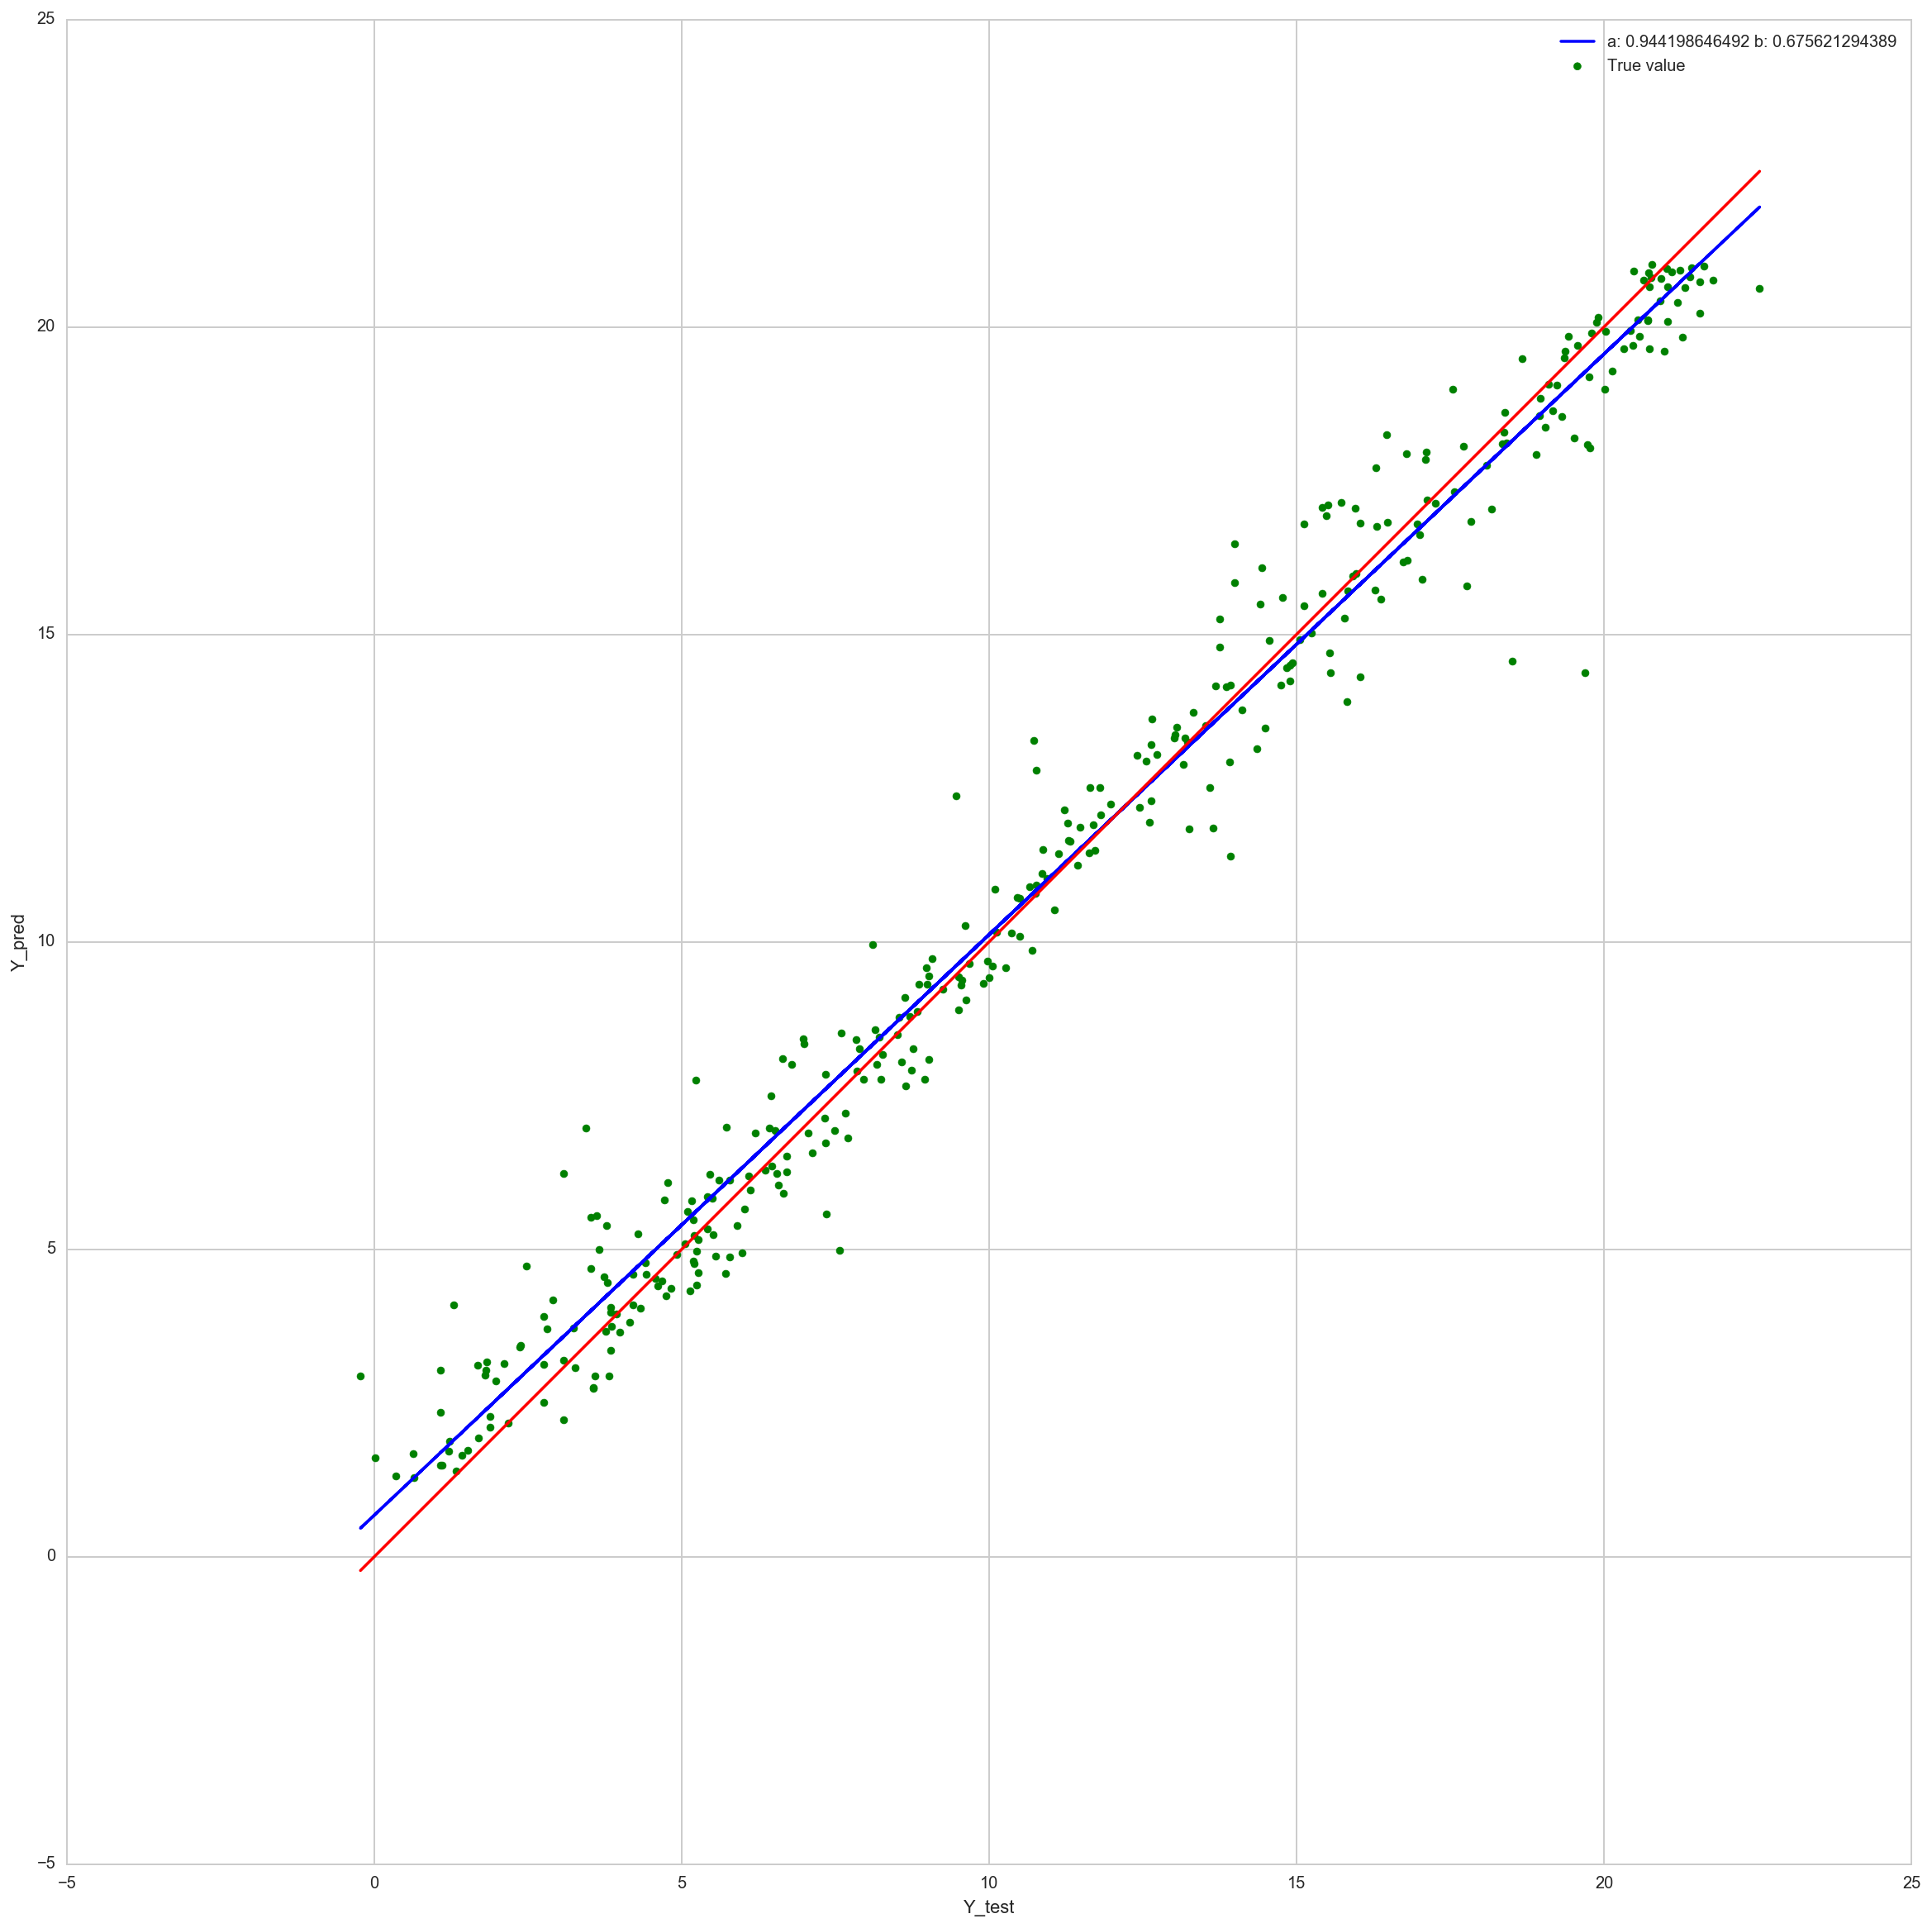

In [5]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.975496058918
Mean Squared Error:  0.948968787143
Median Absolute Error:  0.525567099111
Explained Variance Error:  0.975664204926
a: 0.954197796016 b: 0.57967460591


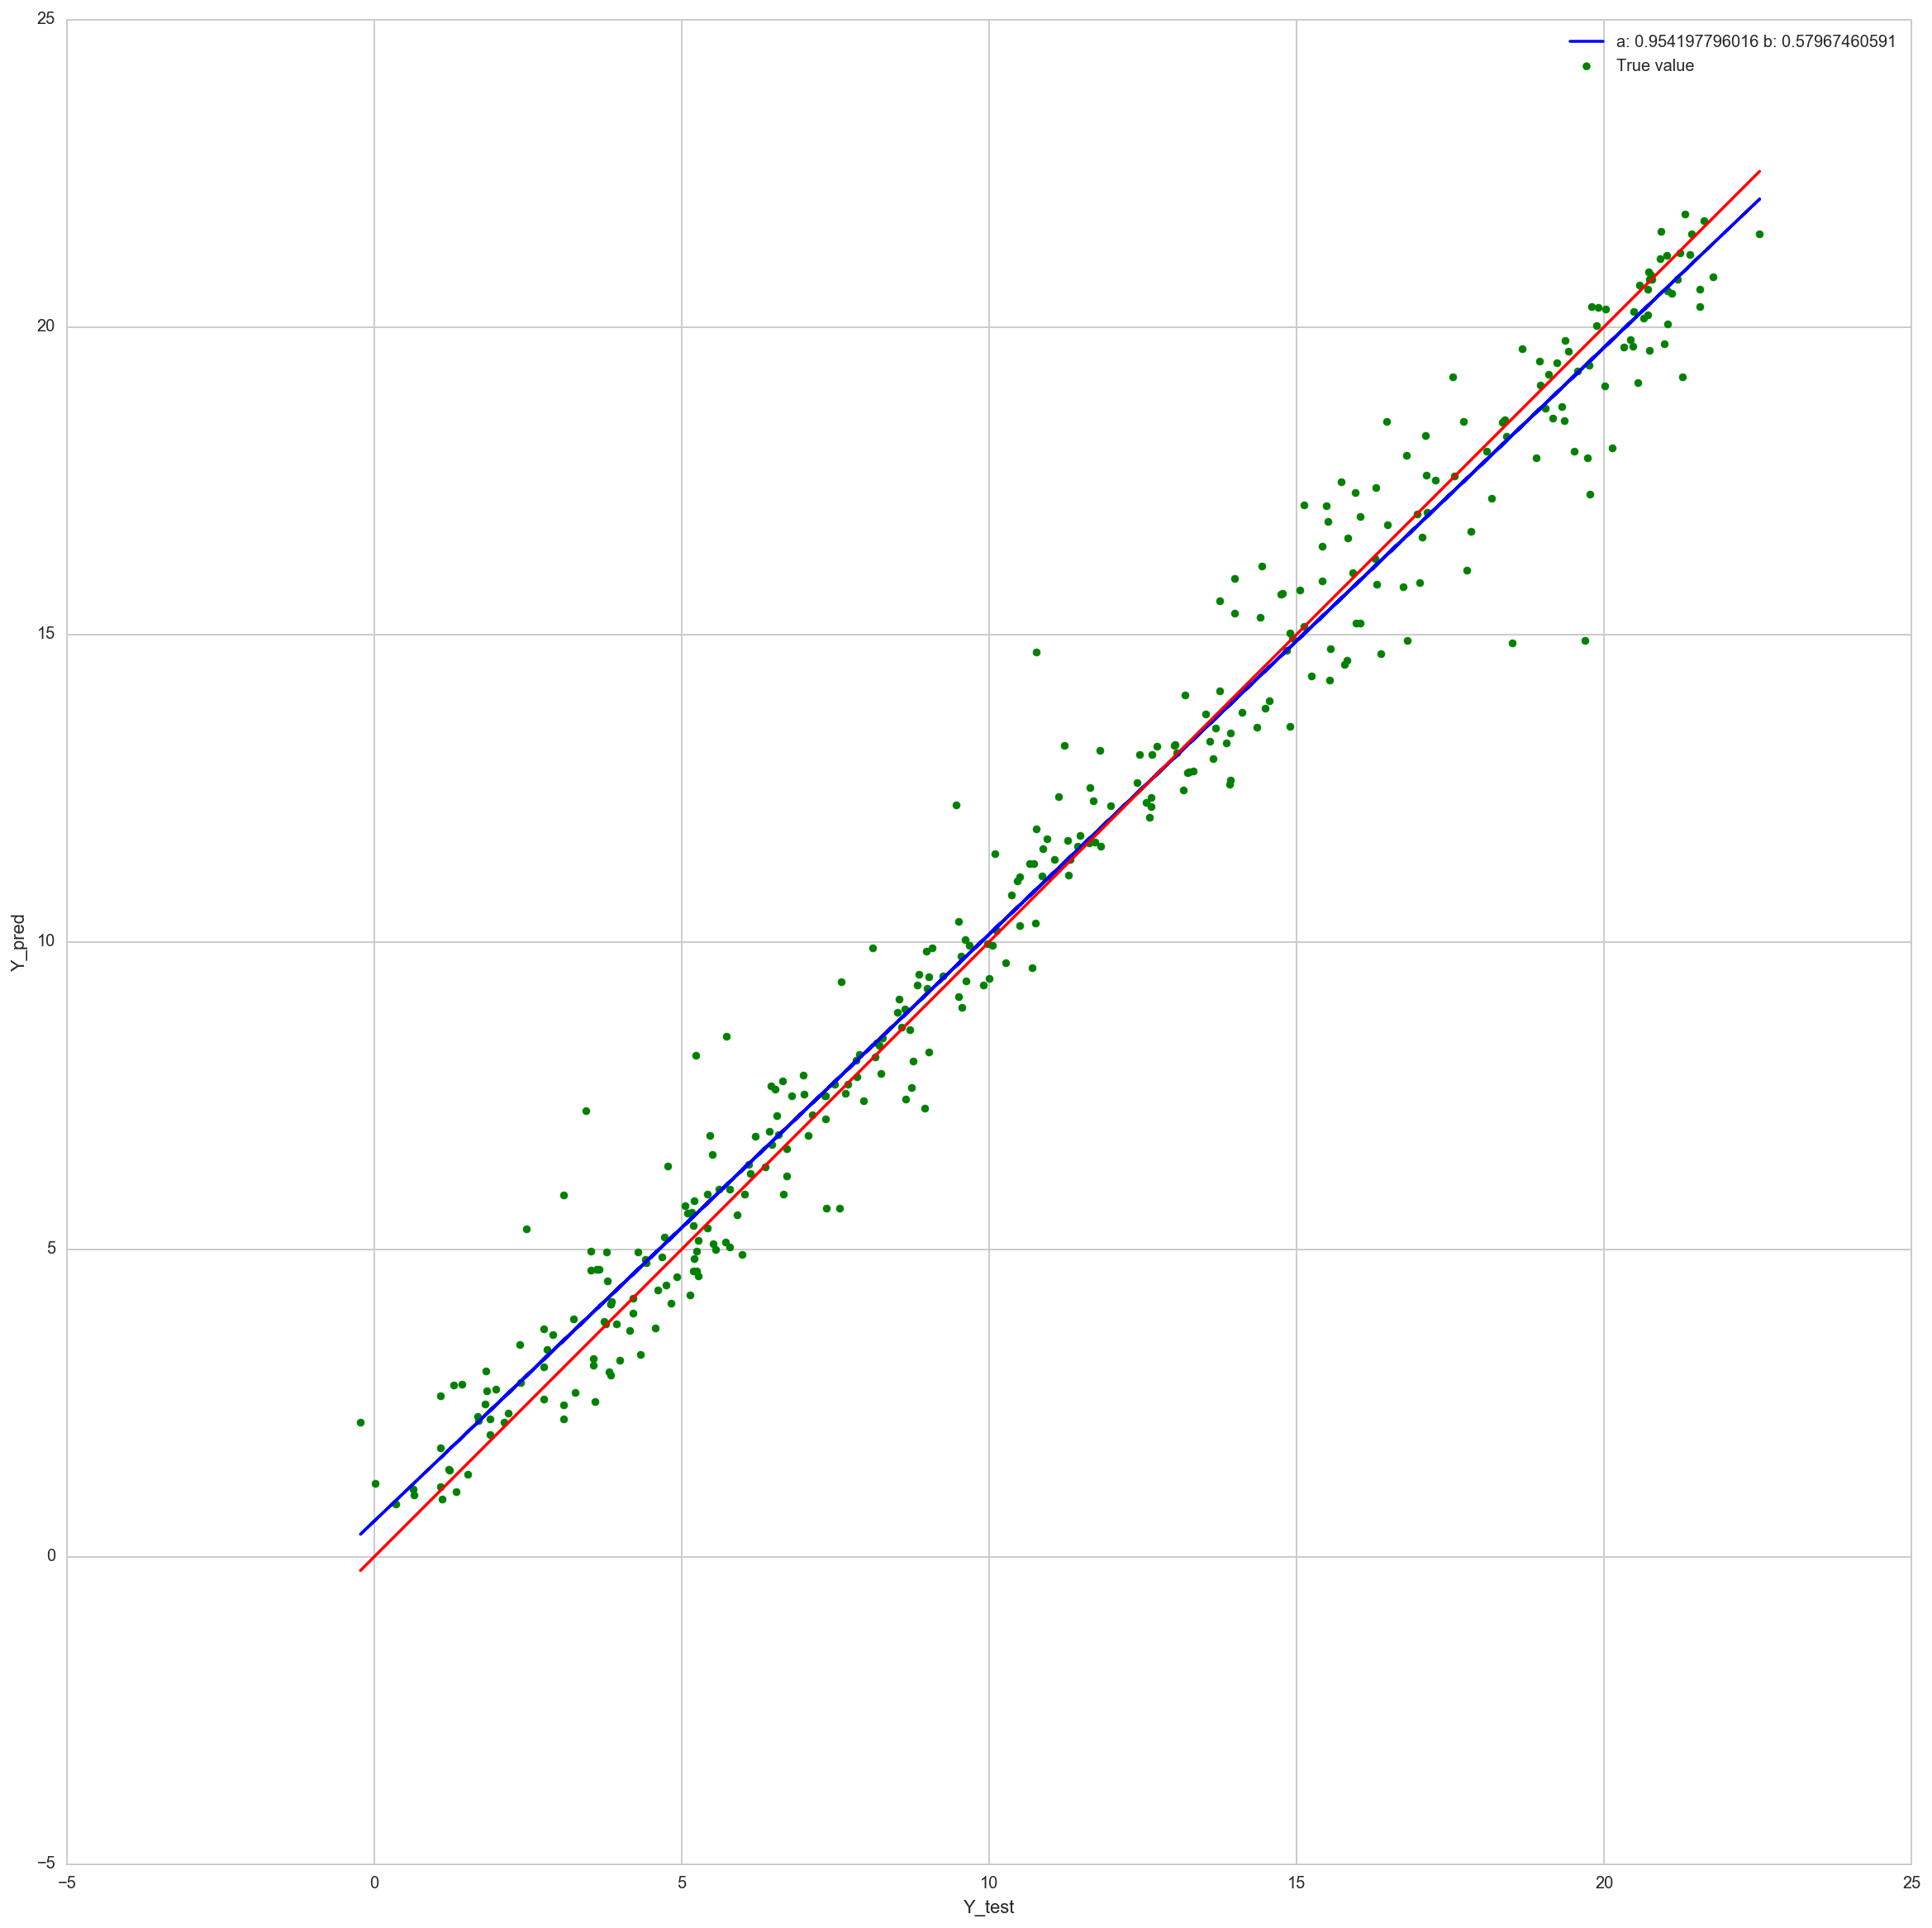

In [6]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.960645700854
Mean Squared Error:  1.52408142852
Median Absolute Error:  0.545852979657
Explained Variance Error:  0.961157917208
a: 0.911391716762 b: 1.10615989834


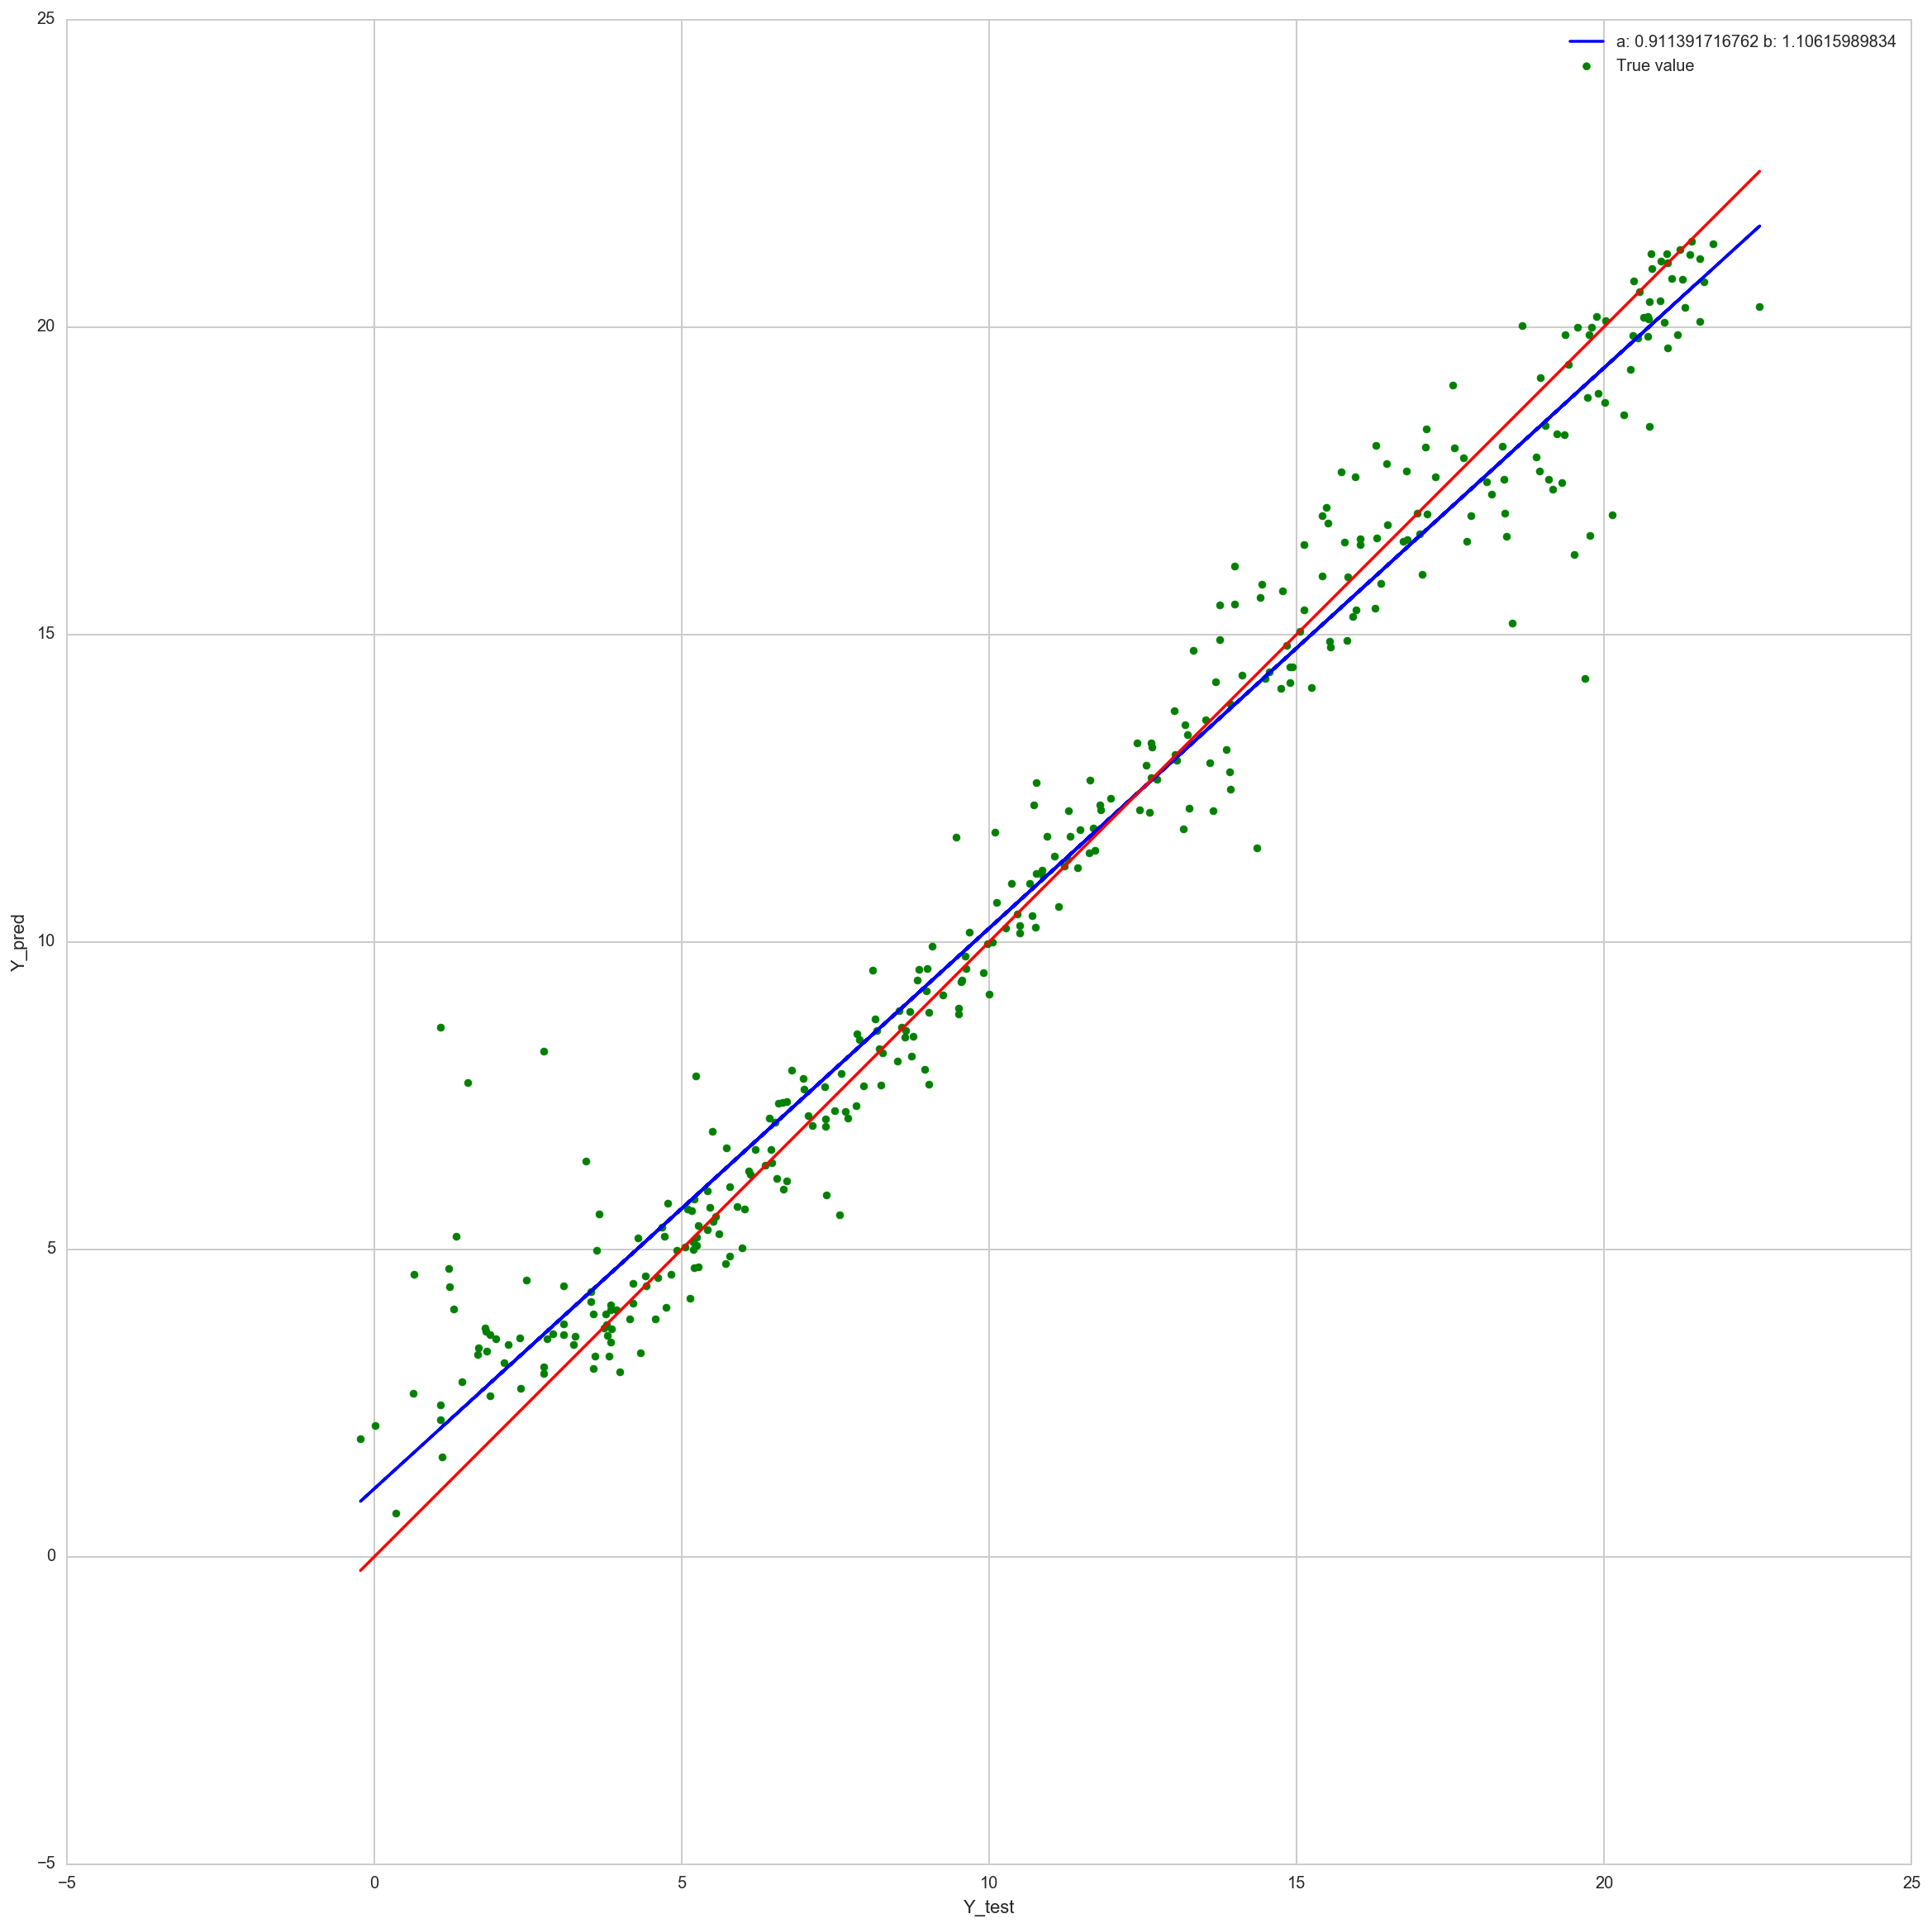

In [7]:
Y_pred = r.predict(r.svm(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

Step #100, epoch #14, avg. train loss: 4.97178
Step #200, epoch #28, avg. train loss: 0.70960
Step #300, epoch #42, avg. train loss: 0.56660
Step #400, epoch #57, avg. train loss: 0.51775
Step #500, epoch #71, avg. train loss: 0.45899
Step #600, epoch #85, avg. train loss: 0.41601
Step #700, epoch #100, avg. train loss: 0.37492
Step #800, epoch #114, avg. train loss: 0.33940
Step #900, epoch #128, avg. train loss: 0.32328
Step #1000, epoch #142, avg. train loss: 0.30489
Step #1100, epoch #157, avg. train loss: 0.28131
Step #1200, epoch #171, avg. train loss: 0.27123
Step #1300, epoch #185, avg. train loss: 0.25384
Step #1400, epoch #200, avg. train loss: 0.24421
Step #1500, epoch #214, avg. train loss: 0.23433
Step #1600, epoch #228, avg. train loss: 0.22796
Step #1700, epoch #242, avg. train loss: 0.21888
Step #1800, epoch #257, avg. train loss: 0.21433
Step #1900, epoch #271, avg. train loss: 0.20582
Step #2000, epoch #285, avg. train loss: 0.20494
Step #2100, epoch #300, avg. train 

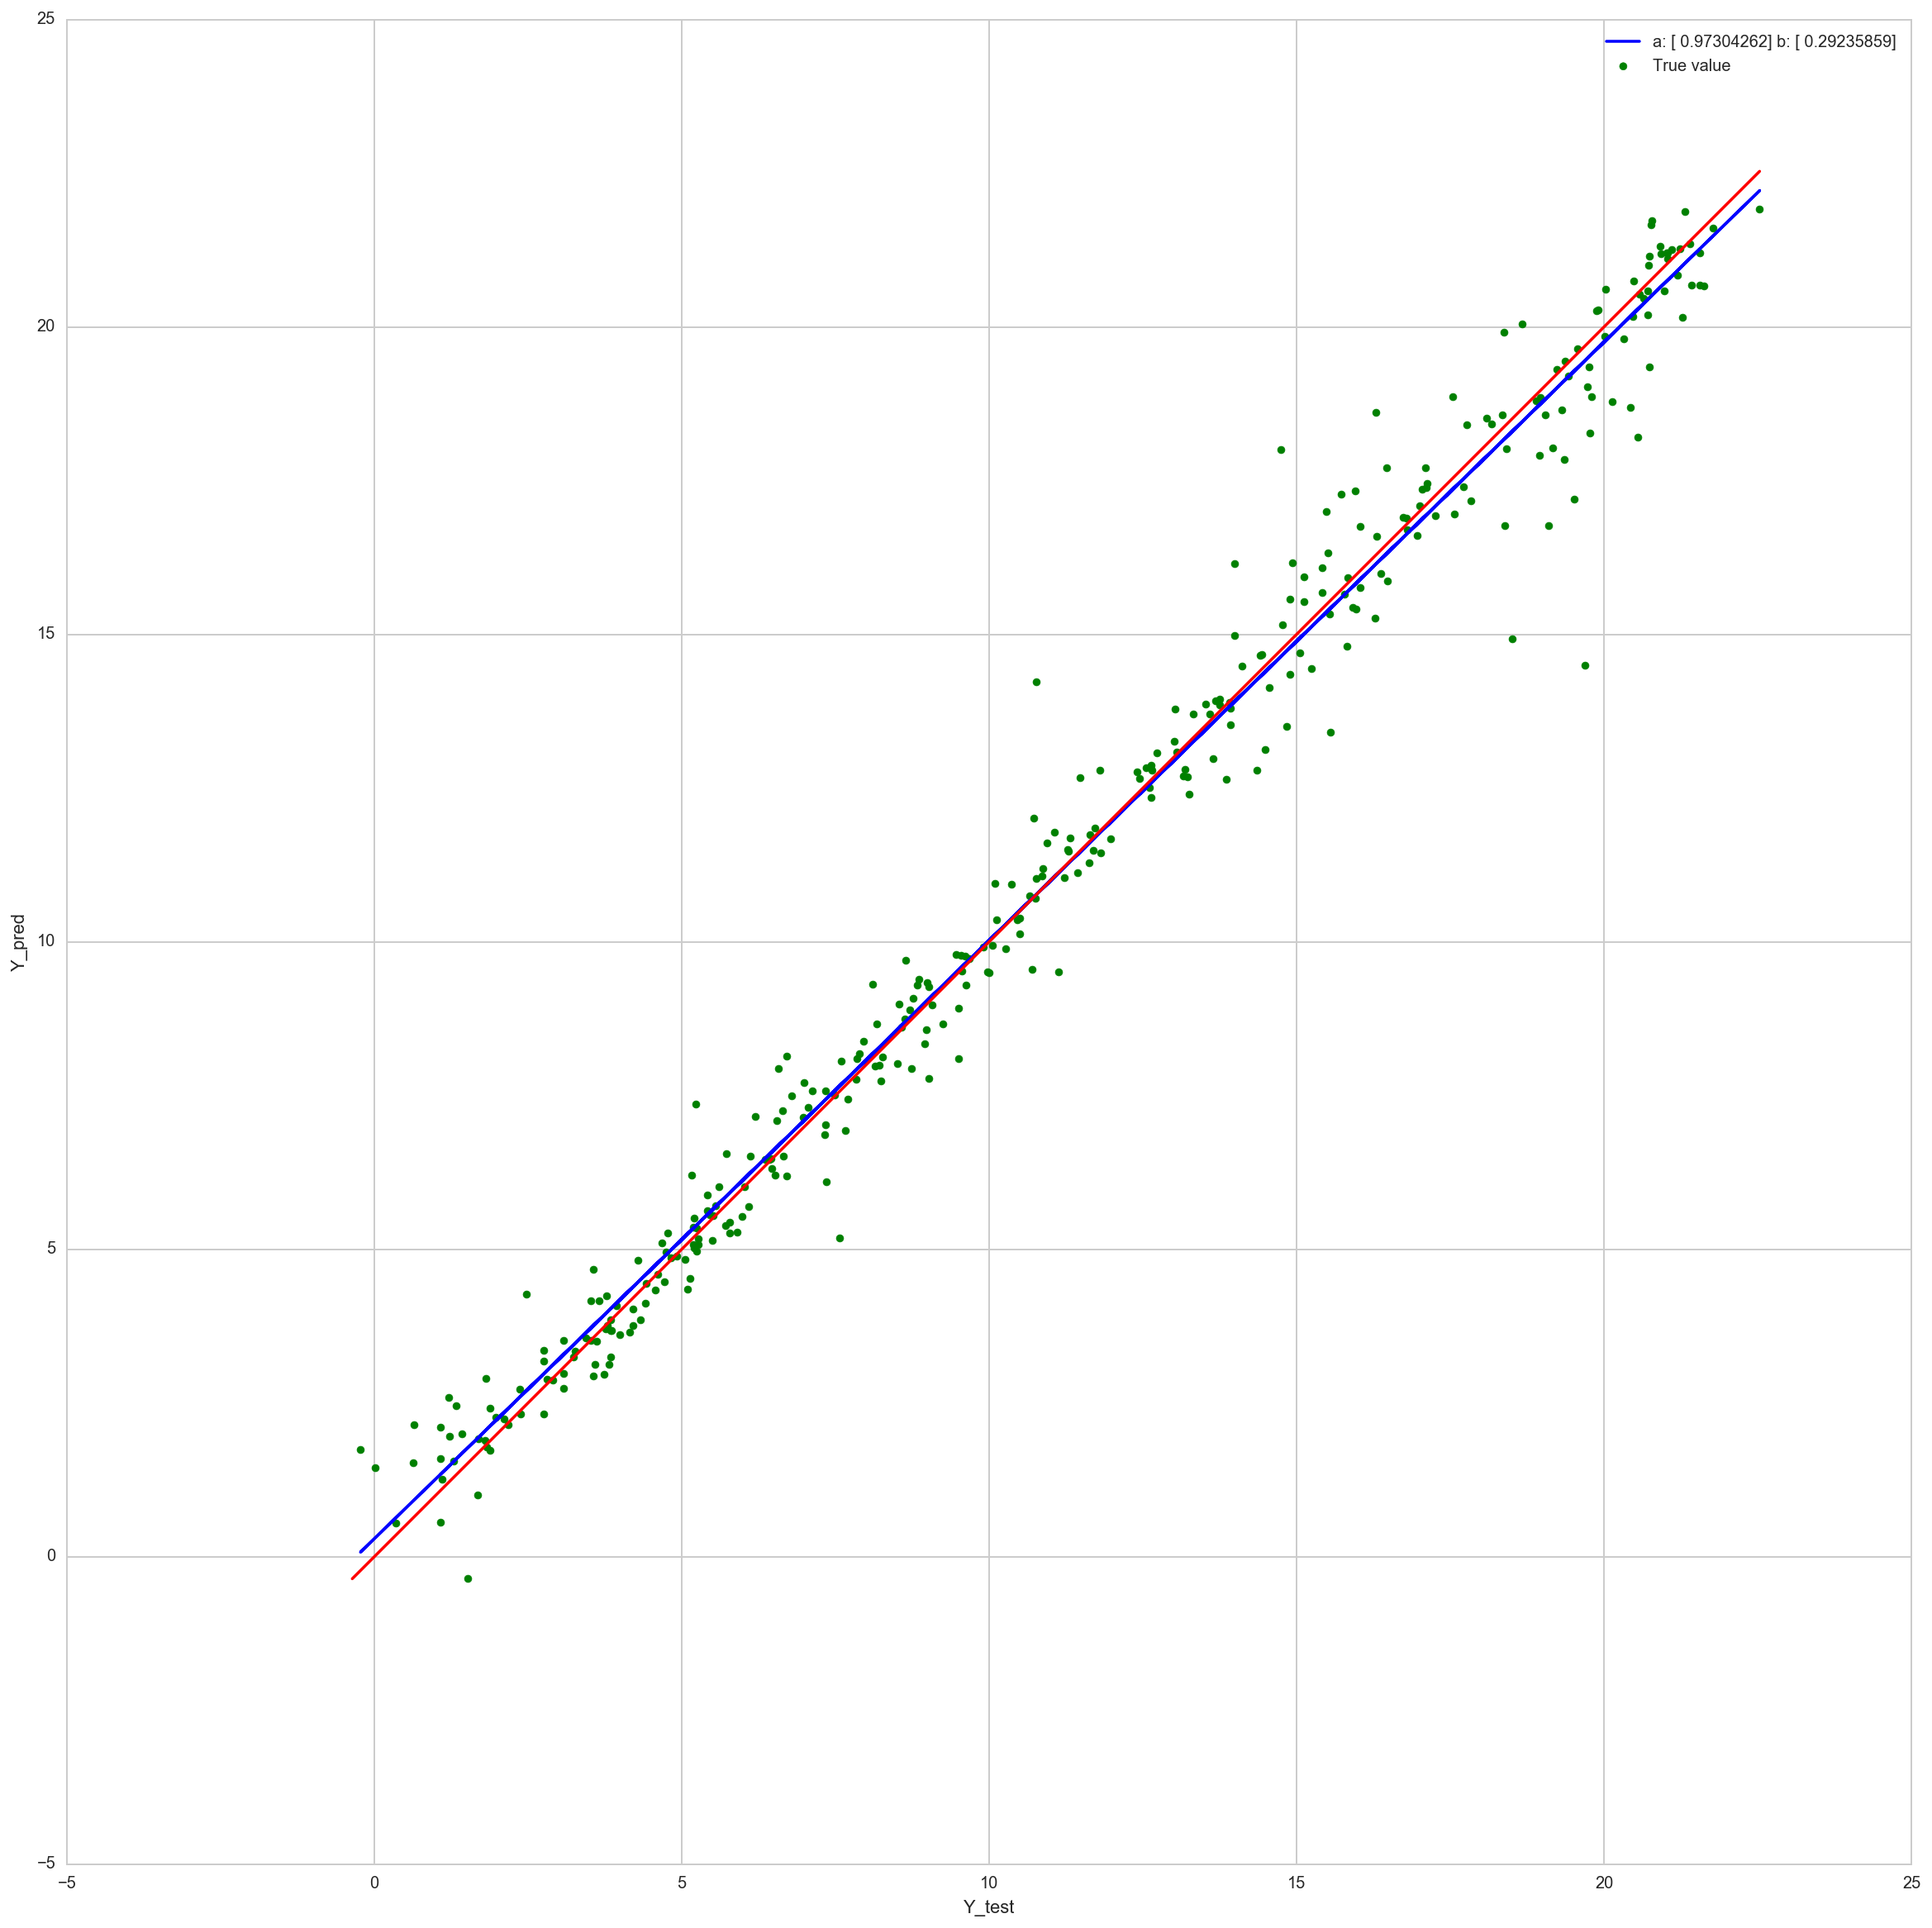

In [8]:
Y_pred = r.predict(r.dnn(nn_steps=5000), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)